# [과제] MNIST 분류 (classification) 모델 구현


개발 관련 하드 스킬이 많이 부족하여 과제 제출 기한을 맞추기 위해 상당 부분 ChatGPT의 도움을 받았습니다. 복습을 더 열심히 하도록 하겠습니다...

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.88MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.71MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



60000
torch.Size([1, 28, 28]) 8


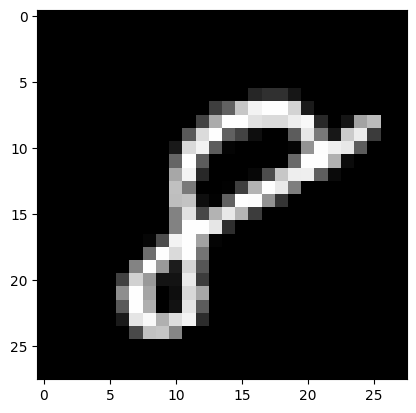

In [ ]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[59999][0].shape, trainset[59999][1]) #코드를 이해하려고 일부러 마지막 데이터 입력해봄
plt.imshow(trainset[59999][0][0], cmap='gray')



In [ ]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [ ]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10) # 출력 10개 클래스로 늘림

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x) # CrossEntropyLoss 포함

    return x


model = Model(28 * 28 * 1, 1024)

In [ ]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

## [LOG] 출력 결과

In [ ]:
train_accs = []  # 학습 정확도 저장 리스트
test_accs = []   # 테스트 정확도 저장 리스트
train_losses = []  # 학습 손실 값 저장 리스트

n_epochs = 20 # 속도 느려서 줄임...

for epoch in range(n_epochs):
    model.train()  # 학습 모드 활성화
    total_loss = 0.0

    # 배치 단위 학습
    for inputs, labels in trainloader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')  # 데이터를 GPU로 이동
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(inputs)  # 예측 값 계산
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트

        total_loss += loss.item()  # 손실 값 누적

    train_losses.append(total_loss)  # 손실 값을 리스트에 저장

    # 에포크별 정확도 계산
    train_acc = accuracy(model, trainloader)
    test_acc = accuracy(model, testloader)
    train_accs.append(train_acc)  # 학습 정확도 저장
    test_accs.append(test_acc)    # 테스트 정확도 저장

    print(f"Epoch {epoch+1:3d} | Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Epoch   1 | Loss: 2131.3052 | Train Acc: 0.4644 | Test Acc: 0.4678
Epoch   2 | Loss: 2060.5005 | Train Acc: 0.6505 | Test Acc: 0.6507
Epoch   3 | Loss: 1948.7347 | Train Acc: 0.7042 | Test Acc: 0.7050
Epoch   4 | Loss: 1758.0021 | Train Acc: 0.7310 | Test Acc: 0.7354
Epoch   5 | Loss: 1475.6452 | Train Acc: 0.7621 | Test Acc: 0.7697
Epoch   6 | Loss: 1170.2208 | Train Acc: 0.7933 | Test Acc: 0.7990
Epoch   7 | Loss: 931.0214 | Train Acc: 0.8182 | Test Acc: 0.8203
Epoch   8 | Loss: 771.1538 | Train Acc: 0.8322 | Test Acc: 0.8345
Epoch   9 | Loss: 665.6261 | Train Acc: 0.8438 | Test Acc: 0.8464
Epoch  10 | Loss: 593.3282 | Train Acc: 0.8528 | Test Acc: 0.8563
Epoch  11 | Loss: 541.3541 | Train Acc: 0.8616 | Test Acc: 0.8639
Epoch  12 | Loss: 502.2322 | Train Acc: 0.8667 | Test Acc: 0.8710
Epoch  13 | Loss: 471.5640 | Train Acc: 0.8731 | Test Acc: 0.8781
Epoch  14 | Loss: 447.0711 | Train Acc: 0.8772 | Test Acc: 0.8802
Epoch  15 | Loss: 427.2605 | Train Acc: 0.8817 | Test Acc: 0.8851
Epoc

In [ ]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

print(model(x))
print(trainset[idx][1])

tensor([[ 1.4469, -3.7215,  0.2856,  4.7781, -5.2074,  4.2699, -2.3900, -0.0495,
          1.3141, -0.4542]], device='cuda:0', grad_fn=<AddmmBackward0>)
5


In [ ]:
def accuracy(model, dataloader):
    model.eval()  # 평가 모드
    correct = 0
    total = 0

    with torch.no_grad():  # 기울기 계산 비활성화
        for inputs, labels in dataloader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)  # 가장 높은 확률의 클래스 선택
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    return correct / total

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,  # 테스트 데이터
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

train_acc = accuracy(model, trainloader)
test_acc = accuracy(model, testloader)
print(f"Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.8949 | Test Accuracy: 0.8987


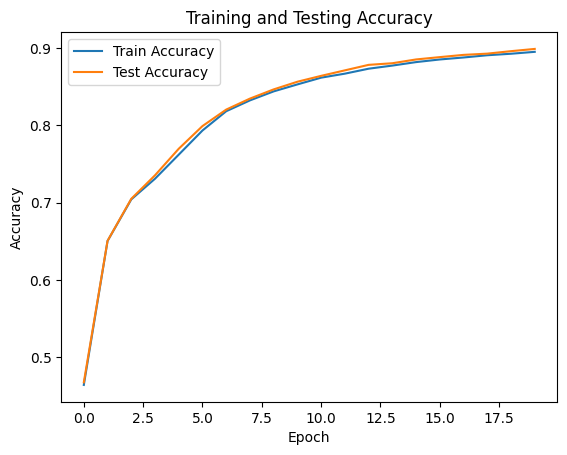

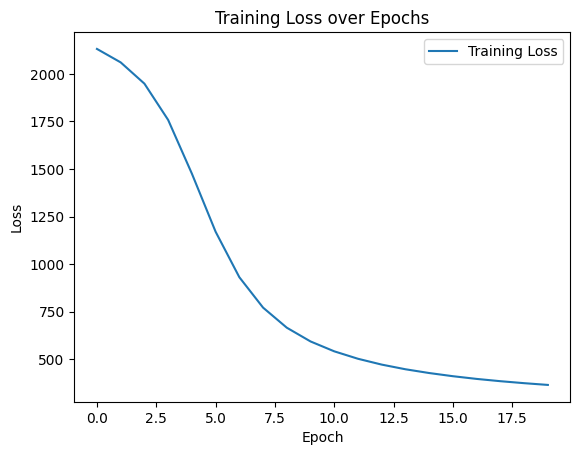

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 학습 정확도 및 테스트 정확도 시각화
plt.plot(range(n_epochs), train_accs, label='Train Accuracy')
plt.plot(range(n_epochs), test_accs, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# 손실 값 시각화
plt.plot(range(n_epochs), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()